In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [94]:
df = pd.read_excel('train.xlsx')

In [95]:
df

CustomerID Gender  Age   Education  Marital Status  Annual Income (k$)  \
0             1      M   19  High School        Married                  15   
1             2      M   21     Graduate         Single                  15   
2             3      F   20     Graduate        Married                  16   
3             4      F   23  High School        Unknown                  16   
4             5      F   31   Uneducated        Married                  17   
..          ...    ...  ...          ...            ...                 ...   
195         196      F   35  High School        Married                 120   
196         197      F   45  High School        Unknown                 126   
197         198      M   32   Uneducated        Married                 126   
198         199      M   32  High School        Married                 137   
199         200      M   30      College        Married                 137   

     Spending Score (1-100)  
0                        39  
1                        81  
2                         6  
3                        77  
4                        40  
..                      ...  
195                      79  
196                      28  
197                      74  
198                      18  
199                      83  

[200 rows x 7 columns]

In [96]:
print(df.columns.tolist())

['CustomerID', 'Gender', 'Age', 'Education ', 'Marital Status', 'Annual Income (k$)', 'Spending Score (1-100)']


In [97]:
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

In [98]:
df

CustomerID  Gender  Age   Education  Marital Status  Annual Income (k$)  \
0             1       0   19  High School        Married                  15   
1             2       0   21     Graduate         Single                  15   
2             3       1   20     Graduate        Married                  16   
3             4       1   23  High School        Unknown                  16   
4             5       1   31   Uneducated        Married                  17   
..          ...     ...  ...          ...            ...                 ...   
195         196       1   35  High School        Married                 120   
196         197       1   45  High School        Unknown                 126   
197         198       0   32   Uneducated        Married                 126   
198         199       0   32  High School        Married                 137   
199         200       0   30      College        Married                 137   

     Spending Score (1-100)  
0                        39  
1                        81  
2                         6  
3                        77  
4                        40  
..                      ...  
195                      79  
196                      28  
197                      74  
198                      18  
199                      83  

[200 rows x 7 columns]

In [99]:
edu = df['Education '].unique()

In [100]:
edu = sorted(edu)
education = {}
for i in range(len(edu)):
    education[edu[i]] = i

education

{'College': 0,
 'Doctorate': 1,
 'Graduate': 2,
 'High School': 3,
 'Post-Graduate': 4,
 'Uneducated': 5,
 'Unknown': 6}

In [101]:
df['Education '] = df['Education '].map(education)

In [102]:
df

CustomerID  Gender  Age  Education  Marital Status  Annual Income (k$)  \
0             1       0   19           3        Married                  15   
1             2       0   21           2         Single                  15   
2             3       1   20           2        Married                  16   
3             4       1   23           3        Unknown                  16   
4             5       1   31           5        Married                  17   
..          ...     ...  ...         ...            ...                 ...   
195         196       1   35           3        Married                 120   
196         197       1   45           3        Unknown                 126   
197         198       0   32           5        Married                 126   
198         199       0   32           3        Married                 137   
199         200       0   30           0        Married                 137   

     Spending Score (1-100)  
0                        39  
1                        81  
2                         6  
3                        77  
4                        40  
..                      ...  
195                      79  
196                      28  
197                      74  
198                      18  
199                      83  

[200 rows x 7 columns]

In [103]:
mar = df['Marital Status'].unique()

In [104]:
mar = sorted(mar)
married = {}
for i in range(len(mar)):
    married[mar[i]] = i

married

{'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}

In [105]:
df['Marital Status'] = df['Marital Status'].map(married)

In [106]:
df

CustomerID  Gender  Age  Education   Marital Status  Annual Income (k$)  \
0             1       0   19           3               1                  15   
1             2       0   21           2               2                  15   
2             3       1   20           2               1                  16   
3             4       1   23           3               3                  16   
4             5       1   31           5               1                  17   
..          ...     ...  ...         ...             ...                 ...   
195         196       1   35           3               1                 120   
196         197       1   45           3               3                 126   
197         198       0   32           5               1                 126   
198         199       0   32           3               1                 137   
199         200       0   30           0               1                 137   

     Spending Score (1-100)  
0                        39  
1                        81  
2                         6  
3                        77  
4                        40  
..                      ...  
195                      79  
196                      28  
197                      74  
198                      18  
199                      83  

[200 rows x 7 columns]

In [107]:
df = df.drop('CustomerID', axis=1)

In [108]:
df

Gender  Age  Education   Marital Status  Annual Income (k$)  \
0         0   19           3               1                  15   
1         0   21           2               2                  15   
2         1   20           2               1                  16   
3         1   23           3               3                  16   
4         1   31           5               1                  17   
..      ...  ...         ...             ...                 ...   
195       1   35           3               1                 120   
196       1   45           3               3                 126   
197       0   32           5               1                 126   
198       0   32           3               1                 137   
199       0   30           0               1                 137   

     Spending Score (1-100)  
0                        39  
1                        81  
2                         6  
3                        77  
4                        40  
..                      ...  
195                      79  
196                      28  
197                      74  
198                      18  
199                      83  

[200 rows x 6 columns]

In [109]:
X = []
for i in range(len(df)):
    X.append([df.iloc[i]['Annual Income (k$)'], df.iloc[i]['Spending Score (1-100)']])

X

[[np.int64(15), np.int64(39)],
 [np.int64(15), np.int64(81)],
 [np.int64(16), np.int64(6)],
 [np.int64(16), np.int64(77)],
 [np.int64(17), np.int64(40)],
 [np.int64(17), np.int64(76)],
 [np.int64(18), np.int64(6)],
 [np.int64(18), np.int64(94)],
 [np.int64(19), np.int64(3)],
 [np.int64(19), np.int64(72)],
 [np.int64(19), np.int64(14)],
 [np.int64(19), np.int64(99)],
 [np.int64(20), np.int64(15)],
 [np.int64(20), np.int64(77)],
 [np.int64(20), np.int64(13)],
 [np.int64(20), np.int64(79)],
 [np.int64(21), np.int64(35)],
 [np.int64(21), np.int64(66)],
 [np.int64(23), np.int64(29)],
 [np.int64(23), np.int64(98)],
 [np.int64(24), np.int64(35)],
 [np.int64(24), np.int64(73)],
 [np.int64(25), np.int64(5)],
 [np.int64(25), np.int64(73)],
 [np.int64(28), np.int64(14)],
 [np.int64(28), np.int64(82)],
 [np.int64(28), np.int64(32)],
 [np.int64(28), np.int64(61)],
 [np.int64(29), np.int64(31)],
 [np.int64(29), np.int64(87)],
 [np.int64(30), np.int64(4)],
 [np.int64(30), np.int64(73)],
 [np.int64(33

In [110]:
def dist(X, Y):
    return (sum([(X[i]-Y[i])**2 for i in range(len(X))]))**0.5

In [119]:
def region(X, point_idx, eps):
    neighs = []
    for i in range(len(X)):
        if dist(X[i], X[point_idx]) <= eps:
            neighs.append(i)
    return neighs

In [123]:
def fit(X, eps, min_samples):
    n = len(X)
    labels = [-1 for i in range(n)]
    cluster_id = 0
    visited = [False for i in range(n)]

    for point_idx in range(n):
        if visited[point_idx] == True:
            continue
        visited[point_idx] = True
        neighs = region(X, point_idx, eps)

        if len(neighs) < min_samples:
            continue
        else:
            labels[point_idx] = cluster_id
            seeds = [seed for seed in neighs if seed != point_idx]
            while seeds:
                cur = seeds.pop(0)
                if not visited[cur]:
                    visited[cur] = True
                    neighs_of_seed = region(X, cur, eps)
                    if len(neighs_of_seed) >= min_samples:
                        for r in neighs_of_seed:
                            if r not in seeds:
                                seeds.append(r)
                if labels[cur] == -1:
                    labels[cur] = cluster_id
        cluster_id += 1
    return labels

In [128]:
labels = fit(X, eps=10, min_samples=2)
unique_labels = set(labels)

unique_labels

{-1, 0, 1, 2, 3, 4, 5}

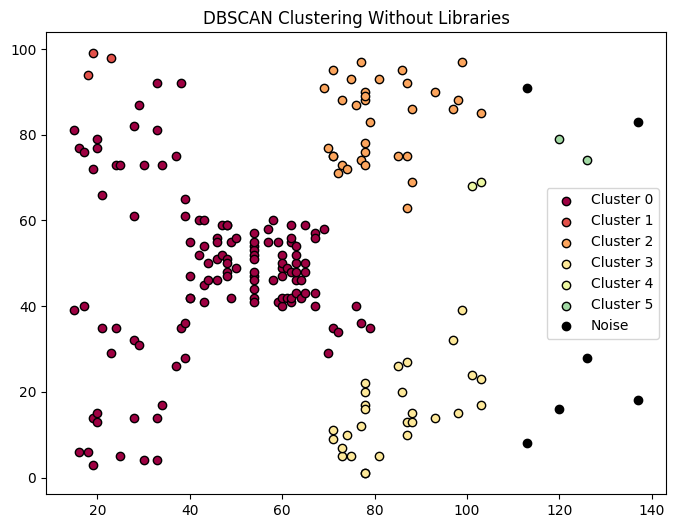

In [129]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(i / len(unique_labels)) for i in range(len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Черный для шума
    cluster_points = [X[i] for i in range(len(X)) if labels[i] == k]
    x, y = zip(*cluster_points)
    plt.scatter(x, y, color=col, edgecolors='k', label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering Without Libraries')
plt.legend()
plt.show()